<hr/>

# Introduction to Data Science - Fall 2021
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- Bayesian inference
- Prior: proper vs improper
- Likelihood function
- Maximum Likelihood Estimation
- Links to least squares

<hr/>

<h1><font color="darkblue">Bayesian Inference</font></h1>

### Joint & Conditional Probability
- Consider random variables $X$, $Y$ of events. Their **joint probability** is

>$\displaystyle P(X=x, Y=y) \neq P(X=x)\,P(Y=y)$ 
>
> instead
>
>$\displaystyle P(X=x, Y=y) = P(X=x)\,P(Y=y \lvert X=x)$ 
>
> where $P(Y = y \lvert X=x)$ is the **conditional probability** of $Y=y$ given $X=x$

- For example, if $X$ represents the event of flipping head and $Y$ is tail on the same trial, $P(X=head,Y=tail)=0$ because $P(Y =tail \lvert  X=head)=0$. 

- But on separate trials, the events would be independent and we would have $P(Y = y \lvert  X=x)=P(Y=y)$.


### Bayes' Theorem

Rev. Thomas Bayes (c.1701-1761)

<img src=https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif align=left height=200>

- The joint probability of $X$ and $Y$ discrete events

>$\displaystyle P(X=x,Y=y) = P(X=x)\,P(Y = y \lvert X = x)$ 
>
> and 
>
>$\displaystyle P(Y=y,X=x) = P(Y=y)\,P(X = x  \lvert Y = y)$ 
>
> Their equality yields
>
>$\displaystyle P(X = x \lvert Y = y) = \frac{P(X = x)\,P(Y = y \lvert X = x)}{P(Y = y)}$ 

- Example:

> * Suppose a certain disease has an incidence rate of 0.1% (that is, about 1 in every 1000 people has the disease. 
>
> * A test has been devised to detect this disease. 
>
> * If the false negative rate is 10% (that is, about 10% of people who take the test will test negative, even though they **do** have the disease)
>
> * and the false positive rate is 5% (that is, about 5% of people who take the test will test positive, even though they **do not** have the disease)
>
> * Suppose a randomly selected person takes the test and tests positive.  What is the probability that this person actually has the disease?                                                                   
    
- Input:

> P(disease)=0.001 <=> P(no disease)=0.999; 
> P(negative | disease)= 0.1 <=> P(positive | disease)= 0.9; 
> P(positive | no disease)=0.05 <=> P(negative | no disease)=0.95 
> 
- Output: P(disease | positive)

> $\displaystyle P(disease | positive) = \frac{P(positive | disease) P(disease)}{P(positive)}$
>
> $\displaystyle P(positive) = P(positive | disease)P(disease) + P(positive | no\ disease)P(no\ disease)$  **(Law of Total Probability)**

In [1]:
print("The probability that this person actually has the disease given the positive test result is %.6f" % ((0.9 * 0.001)/(0.9 * 0.001 + 0.05 * 0.999)))

The probability that this person actually has the disease given the positive test result is 0.017699


**Unhomework:** If a person takes the test twice (independently), and both results are positive. What is the probability that this person actually has the disease?                                         

### Probability Densities
- It is also true in the continuous case and PDFs

>$\displaystyle P(X = x \lvert y) = \frac{P(X = x)\,p(y \lvert X = x)}{p(y)}$ 
>
> and
>
>$\displaystyle p(x \lvert Y = y) = \frac{p(x)\,P(Y = y \lvert x)}{P(Y = y)}$ 
>

- Also

>$\displaystyle p(x \lvert y) = \frac{p(x)\,p(y \lvert x)}{p(y)}$ 
>
> where
>
>$\displaystyle p(y) = \int p(x)\,p(y \lvert x)\,dx$ 
>
> to ensure that
>
>$\displaystyle \int p(x \lvert y)\,dx = 1$ 

### Probabilitistic Model
- From data $D$ we can **infer** the parameters $\theta$ of model $M$ 

>$\displaystyle p(\theta \lvert D) = \frac{p(\theta)\,p(D \lvert \theta)}{p(D)}$ 
>
> or including the model $M$ explicitly
>
>
>$\displaystyle p(\theta \lvert D,M) = \frac{p(\theta \lvert M)\,p(D \lvert \theta,M)}{p(D \lvert M)}$ 



### Likelihood Function, Prior distribution, Posterior distribution

- From data $D$ we can **infer** the parameters $\theta$ of model $M$ 

>$\displaystyle p(\theta \lvert D) = \frac{\pi(\theta)\,{\cal{}L}\!_D(\theta)}{Z}$ 
>
> where the normalization
>
>$\displaystyle Z = \int \pi(\theta)\,{\cal{}L}\!_D(\theta)\ d\theta $ 
>
> * $Z = p(D)$ also called **evidence**, which is the probability of the data, not given any specific set of parameters $\theta$, but given the model we choose.

- The **posterior** $p(\theta \lvert D)$ is proportional to the **prior** $\pi(\theta)$ times the **likelihood function** ${\cal{}L}\!_D(\theta)$

### Data
- A set of independent measurements

>$\displaystyle D = \Big\{x_i\Big\}_{i=1}^N$

- E.g., heights of people in a conference

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data set of heights
heights = np.array([183, 168, 177, 160, 175, 167, 158, 166, 174, 178])

### Model Parametrization

- For example, we can assume that the true height can be modelled by a Gaussian distribution, and it is parameterized with a mean $\mu$ and a standard deviation $\sigma$

> *“All models are wrong, but some are useful”*. --- George E. P. Box

> Deciding which model to use can be obvious in few cases, but it will be complex in many others, for which we will use a combination of different distributions to explain how our data was generated.

### What is the likelihood function?

- The likelihood is the probability of obtaining the data $x_i$ from the choosen model (e.g. the Gaussian distribution) and for a specific set of parameters $\theta$. For a set of independent measurements:

>$\displaystyle {\cal L}\!_D(\mu, \sigma) = p(D \lvert \mu, \sigma^2) = p(\{x_i\!\}\lvert\mu, \sigma^2) = \prod_{i=1}^N p(x_i\lvert\mu, \sigma^2) = \prod_{i=1}^N \ell\!_{i}(\mu,\sigma)$

- For example, Gaussian uncertainties

>$\displaystyle \ell\!_{i}(\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\ \exp\left\{-\frac{(x_i-\mu)^2}{2\sigma^2}\right\}$



Text(0, 0.5, '$\\sigma$')

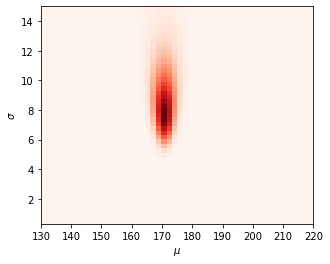

In [14]:
import scipy.stats

# lets create a grid of our two parameters
mu = np.linspace(130, 220)
sigma = np.linspace(0, 15)[::-1]

mm, ss = np.meshgrid(mu, sigma[:-1])  # just broadcasted parameters

# compute likelihood
likelihood = np.prod([stats.norm(mm, ss).pdf(a) for a in heights], axis=0)
aspect = mm.max() / ss.max() / 3
extent = [mm.min(), mm.max(), ss.min(), ss.max()]
# extent = left right bottom top

plt.imshow(likelihood, cmap='Reds', aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

In [20]:
likelihood.shape

(49, 50)

In [11]:
ss

array([[15.        , 15.        , 15.        , ..., 15.        ,
        15.        , 15.        ],
       [14.69387755, 14.69387755, 14.69387755, ..., 14.69387755,
        14.69387755, 14.69387755],
       [14.3877551 , 14.3877551 , 14.3877551 , ..., 14.3877551 ,
        14.3877551 , 14.3877551 ],
       ...,
       [ 0.91836735,  0.91836735,  0.91836735, ...,  0.91836735,
         0.91836735,  0.91836735],
       [ 0.6122449 ,  0.6122449 ,  0.6122449 , ...,  0.6122449 ,
         0.6122449 ,  0.6122449 ],
       [ 0.30612245,  0.30612245,  0.30612245, ...,  0.30612245,
         0.30612245,  0.30612245]])

In [12]:
np.linspace(0, 1,3)

array([0. , 0.5, 1. ])

In [18]:
likelihood.shape

(49, 50)

### Prior Distribution

- The prior is our knowledge of the parameters before we observe the data. It's probably the most subjective part of Bayesian inference, and different approaches can be used. For example, use the mean of the world population as the mean of our prior, which is arond 165 cms, and take the standard deviation of the world population, 7 cms.

> We pick an appropriate prior - often people say we use a "flat" prior because we don't know...

- We could have chosen another parametrization, say $\tan \phi$ with $\phi \in \left(-\frac{\pi}{2},\frac{\pi}{2} \right)$

> Clearly a "flat prior" means something different!
><br/>
> What should be the prior? Needs careful consideration!

- Non-informative prior?

> For more, see [Jeffreys prior](https://en.wikipedia.org/wiki/Jeffreys_prior)

Text(0, 0.5, '$\\sigma$')

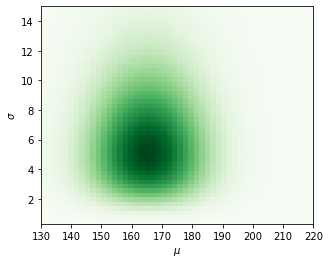

In [21]:
# prior information
world_height_mean = 165
world_height_standard_deviation = 7

# plot the prior distribution
prior = stats.norm(world_height_mean, world_height_standard_deviation*2).pdf(mm) * stats.gamma(world_height_standard_deviation*0.5,0,2).pdf(ss)

plt.imshow(prior, cmap='Greens', aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

In [23]:
stats.norm(world_height_mean, world_height_standard_deviation*2).pdf(mm).shape

(49, 50)

### Detour: Improper Priors

- The posterior PDF is

>$\displaystyle p(\theta|D) = \frac{\pi(\theta) \prod {\ell}\!_i(\theta)}{\int \pi(\theta) \prod {\ell}\!_i(\theta)\,d\theta}\ $ 

- Uniform prior?

> Using $\pi(\theta)\!=\!1$ is clearly wrong but what if the prior is flat over the interval where likelihood function is non-zero (if!), the normalization cancels from the ratio


### Posterior distribution

- $\displaystyle p(\theta \lvert D) = \frac{\pi(\theta)\,{\cal{}L}\!_D(\theta)}{Z}$ 

In [1]:
# compute the posterior for the grid
unnormalized_posterior = prior * likelihood
posterior = unnormalized_posterior / (-np.trapz(np.trapz(unnormalized_posterior,mu),sigma[:-1]))
plt.imshow(posterior, cmap='Blues', aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

NameError: name 'prior' is not defined

### Estimation

- Expected value

>$\displaystyle \int \mu\, p(\mu \lvert D)\, d\mu$

> where $p(\mu \lvert D) = \int p(\theta \lvert D)\, d\sigma$

- Variance: 2nd central moment




Mean and variance of μ̂ is (170.402713, 6.911867).


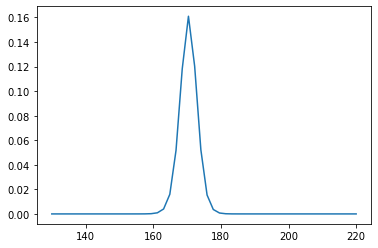

In [6]:
# mean and variance of mu_hat
posterior_mu = -np.trapz(posterior,sigma[:-1], axis = 0)
plt.plot(mu,posterior_mu)
mu_mean = np.trapz(mu*posterior_mu,mu)
mu_var = np.trapz((mu-mu_mean)**2*posterior_mu,mu)
print("Mean and variance of \u03BC\u0302 is (%.6f, %.6f)." % (mu_mean, mu_var))

### Maximum Likelihood Estimation (MLE)

- Maximizing ${\cal{}L}$ is the same as minimizing $-\log{\cal{}L}$, $\hat\theta_{MLE} = argmin_{\theta}\ -\log \cal{}L\!_D(\theta)$ 

> $\displaystyle -\log{\cal{}L(\mu)} = \mathrm{const.} + \sum_{i=1}^N \frac{(x_i\!-\!\mu)^2}{2\sigma^2}$
><br/>
><br/>
> Cf. the method of least squares




In [7]:
# MLE using a grid approximation
ind = np.where(likelihood == likelihood.max())
print("MLE for (\u03BC,\u03C3) is (%.6f, %.6f)." % (mm[ind], ss[ind]))

MLE for (μ,σ) is (170.408163, 7.653061).


### Result

- $\displaystyle \hat\mu = \sum_{i=1}^N \frac{x_i}{N}$, $\displaystyle \hat\sigma^2 = \frac{1}{N} \sum_{i=1}^N (x_i - \hat\mu)^2$

In [8]:
# exact MLE result
[np.mean(heights), np.sqrt(np.var(heights))]

[170.6, 7.696752561957543]

- If we know $\sigma_i$

- Weighted average! Using $w_i = 1 \big/ \sigma_i^2$

> $\displaystyle \hat{\mu} = \frac{\sum w_i x_i}{\sum w_i}$

- Also variance!

>$\displaystyle \frac{1}{\sigma_{\mu}^2} = \sum w_i = \sum \frac{1}{\sigma_i^2}$
><br/>
><br/>
> If all have the same $\sigma$, we have
><br/>
><br/>
>$\displaystyle \frac{1}{\sigma_{\mu}^2} = \frac{N}{\sigma^2}$
$\ \ \ \rightarrow\ \ \ \
\displaystyle \sigma_{\mu} = {\sigma} \big/{\sqrt{N}}$

### Maximum a Posteriori estimation (MAP)

- $\hat\theta_{MAP} = argmin_{\theta}\ -\log \cal{}L\!_D(\theta) -\log \pi(\theta)$ 

In [9]:
# MAP using a grid approximation
ind = np.where(posterior == posterior.max())
print("MAP for (\u03BC,\u03C3) is (%.6f, %.6f)." % (mm[ind], ss[ind]))

MAP for (μ,σ) is (170.408163, 7.346939).


- if we know $\sigma_i \equiv \sigma$, $\pi(\mu) = \mathcal{N}(\mu_0,\sigma_0^2)$

> $\displaystyle \hat{\mu} = \frac{N\sigma_0^2}{\sigma^2+N\sigma_0^2}\bar{x}+\frac{\sigma^2}{\sigma^2+N\sigma_0^2}\mu_0$

> $\displaystyle \sigma_{\mu}^2  = (\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2})^{-1}$